<img src="https://drive.google.com/uc?export=view&id=1uDiRDsBQS2OijoIu83KvnqRfAOlToUk2" style="width: 200px;"/>

# Deep Learning in Computer Vision
##### Serhii Pyskovatskyi

Description:

In this notebook you will learn how to train a handwritten digit classifier.
You will use data from MNIST database, which contains images of digits from 0 to 9. You will utilize Convolutional Neural Network to solve that task. At the end you will have a chance to create your own network.

<a href="https://colab.research.google.com/drive/1Qc1RgnCZI_HsQW696e1fZ2S2zLAcBeyU#scrollTo=aMESP4RAJbbc">Run in Google Colab</a>
## Table of Contents
**[1. Handwritten digit classifier](#1.-Section-1)<br>**
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 MNIST dataset](#1.1-Subsection-1.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Neural Network](#1.2-Subsection-1.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Training the model](#1.3-Subsection-1.3)<br>
**[2. Task](#2.-Section-2)<br>**

---
<a name="1.-Section-1"></a>
# 1. Handwritten digit classifier

In this section you will learn:
 - how to load MNIST dataset

 - how to create a simple CNN in Pytorch

 - how to train and evaluate the network

 To code below imports all required libraries.

In [ ]:
import numpy as np
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

<a name="1.1-Subsection-1.1"></a>
## 1.1 MNIST dataset

[MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. It is a very popular dataset for creating your first CNN classifier. We will use methods available in Pytorch to load it.

In [ ]:
# Load the data and split it between train and test sets
x_train = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
x_test = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)


100%|██████████| 9912422/9912422 [00:00<00:00, 35544274.41it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 120293638.36it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 48990503.49it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22760488.37it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



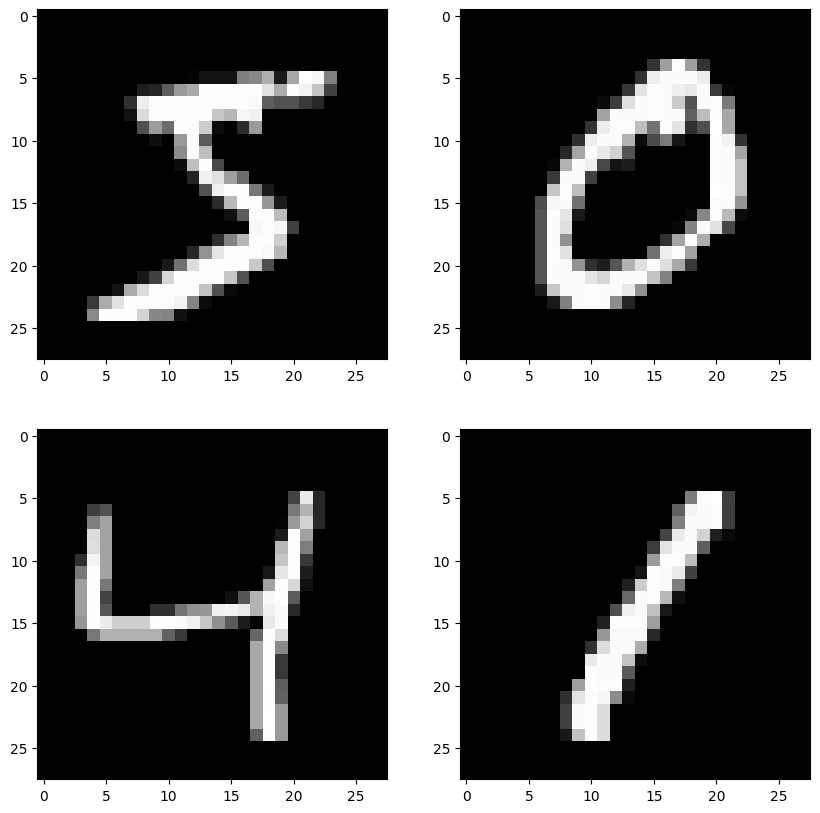

In [ ]:
# Let's visualize some of the data
import matplotlib.pyplot as plt

# We need to create a figure
fig = plt.figure(figsize=(10, 10))

# Then we have to add subplots to the figure and plot the images
fig.add_subplot(2, 2, 1)
plt.imshow(x_train.data[0], cmap='gray')

fig.add_subplot(2, 2, 2)
plt.imshow(x_train.data[1], cmap='gray')

fig.add_subplot(2, 2, 3)
plt.imshow(x_train.data[2], cmap='gray')

fig.add_subplot(2, 2, 4)
plt.imshow(x_train.data[3], cmap='gray')

As we can see the images are in grayscale. What other properties do these images have? Let's find out.

In [ ]:
# Train dataset
print(f"The train part of the dataset contains: {x_train.data.shape[0]} images")
# Test dataset
print(f"The test part of the dataset contains: {x_test.data.shape[0]} images")
# One image
print(f"Shape of one image is: {x_train.data[0].shape}")
print(f"Data type of the images is: {x_train.data[0].dtype}")
print(f"Max value of images is: {x_train.data.max()} and min value of images is: {x_train.data.min()}")

The train part of the dataset contains: 60000 images
The test part of the dataset contains: 10000 images
Shape of one image is: torch.Size([28, 28])
Data type of the images is: torch.uint8
Max value of images is: 255 and min value of images is: 0


So we have checked other properties of the dataset. We now know that there are 60000 images in the train set and 10000 images in the test set. The images are 28 pixels wide and 28 pixel high. They are represented as 8 bit unsigned integers,so they can hold values from 0 to 255.
.

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.



In [ ]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(x_train,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),

    'test'  : torch.utils.data.DataLoader(x_test,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7c5c5b583f70>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7c5c5b583c70>}

<a name="1.2-Subsection-1.2"></a>
## 1.2 Neural Network


It's time to create the model. We will use torch.nn  that enables creation of Neural Network models.

In [ ]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


<a name="1.3-Subsection-1.3"></a>
## 1.3 Training the model


We now have almost all of the elements required for model training. The data is loaded and the model is defined. Last thing we need to do is to compile the model. During that we determine which loss function we would like to use and what optimizer will be used to update the parameters. Also we determine the type of metrics that will be used to evaluate our model.



In [ ]:
loss_func = nn.CrossEntropyLoss()
loss_func

from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

We choose device on which we will train our network. <br />
The device can be GPU (cuda:0) or cpu if cuda is not present.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

And we move our model to the device

In [ ]:
cnn = cnn.to(device)

Now we can train the model.

In [ ]:
num_epochs = 5
val_loss = []

def train(num_epochs, cnn, loaders):

    cnn.train()

    # Train the model
    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):

            # gives batch data, normalize x when iterate train_loader
            b_x = images.to(device)  # batch x
            b_y = labels.to(device)   # batch y
            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()


            if (i+1) % 100 == 0:
              val_loss.append(loss.item()) # this is neede for visualization
              print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
              pass
        pass


    pass
train(num_epochs, cnn, loaders)

Epoch [1/5], Step [100/600], Loss: 0.2256
Epoch [1/5], Step [200/600], Loss: 0.2627
Epoch [1/5], Step [300/600], Loss: 0.0397
Epoch [1/5], Step [400/600], Loss: 0.0663
Epoch [1/5], Step [500/600], Loss: 0.0667
Epoch [1/5], Step [600/600], Loss: 0.0650
Epoch [2/5], Step [100/600], Loss: 0.0210
Epoch [2/5], Step [200/600], Loss: 0.0702
Epoch [2/5], Step [300/600], Loss: 0.0333
Epoch [2/5], Step [400/600], Loss: 0.0952
Epoch [2/5], Step [500/600], Loss: 0.0846
Epoch [2/5], Step [600/600], Loss: 0.1077
Epoch [3/5], Step [100/600], Loss: 0.1054
Epoch [3/5], Step [200/600], Loss: 0.0525
Epoch [3/5], Step [300/600], Loss: 0.0503
Epoch [3/5], Step [400/600], Loss: 0.0276
Epoch [3/5], Step [500/600], Loss: 0.0625
Epoch [3/5], Step [600/600], Loss: 0.0802
Epoch [4/5], Step [100/600], Loss: 0.0307
Epoch [4/5], Step [200/600], Loss: 0.0940
Epoch [4/5], Step [300/600], Loss: 0.0620
Epoch [4/5], Step [400/600], Loss: 0.0247
Epoch [4/5], Step [500/600], Loss: 0.1256
Epoch [4/5], Step [600/600], Loss:

With the model trained we can check the accuracy of our model on a test dataset.

In [ ]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            images = images.to(device)  # batch x
            labels = labels.to(device)   # batch y
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    pass
test()


Test Accuracy of the model on the 10000 test images: 0.99


Accuracy on test set is very high. This means that our model is classifying digits very well. To finish this notebook let's visualize results of training.

Text(0.5, 1.0, 'Loss')

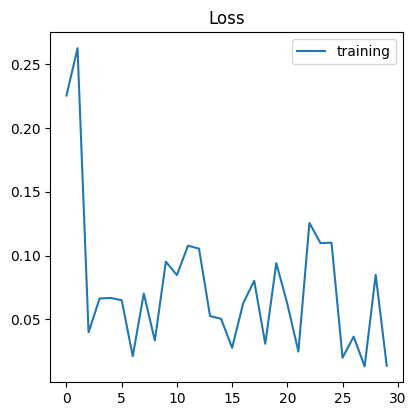

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 2, 2)

plt.plot(val_loss)
plt.legend(['training', 'validation'])
plt.title("Loss")

---
<a name="2.-Section-2"></a>
# 2. Task: create a classifier for CIFAR10 dataset

CIFAR10 is a dataset that contains images from 10 different classes. The classes are: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Based on the code above experiment with this dataset.
Try to visualize the different classes. Create a classifier for them. Try to change neural network parameters and look what happens. Wish you luck.

In [ ]:
x_train = datasets.CIFAR10(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
x_test = datasets.CIFAR10(
    root = 'data',
    train = False,
    transform = ToTensor()
)

100%|██████████| 170498071/170498071 [00:03<00:00, 49725961.73it/s]


Extracting data/cifar-10-python.tar.gz to data


In [ ]:
# Place your code here













---

This notebook is a part of introductory machine learning course, led by the [Gradient](https://gradient.eti.pg.gda.pl/) science club in the 2023/2024 school year.

<img src="https://drive.google.com/uc?export=view&id=1P7SX6J_GWlS1ENxVaZCcBO0BxHP6ULEg" width="1050"/>